# Check enformer tracks 

In [1]:
import pandas as pd
import os
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Load data

In [2]:
# Load enformer tracks 
datadir = "../../../../data/FED"
suppl = pd.ExcelFile(os.path.join(datadir, "enformer_suppl.xlsx"))
print(suppl.sheet_names)
suppl_human = suppl.parse(suppl.sheet_names[1])
suppl_mouse = suppl.parse(suppl.sheet_names[2])
suppl_human["organism"] = "human"
suppl_mouse["organism"] = "mouse"
frames = [suppl_human, suppl_mouse]
suppl_df = pd.concat(frames)

['Supplementary Table 1', 'Supplementary Table 2', 'Supplementary Table 3']


In [3]:
type(suppl_df)
suppl_df[["assay_type", "genome"]]

,assay_type,genome
0,DNASE,0.0
1,DNASE,0.0
2,DNASE,0.0
3,DNASE,0.0
4,DNASE,0.0
...,...,...
1638,CAGE,1.0
1639,CAGE,1.0
1640,CAGE,1.0
1641,CAGE,1.0


## Check training tracks

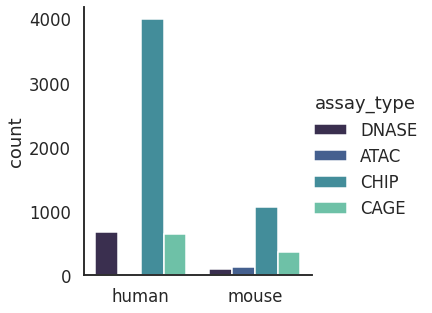

In [10]:
#suppl_df.groupby(['organism']).size()
sns.set_theme(style="white", context="talk")
ax = sns.catplot(x="organism", hue="assay_type", kind="count", data=suppl_df, palette="mako", legend_out=True)
ax.set(xlabel=None)
#plt.legend( loc = 2, bbox_to_anchor = (0.5,1))

In [11]:
suppl_df["description"]

def extract_tissue(text):
    m = re.search(':(.+?),', text)
    if m:
        return(m.group(1))
    else: 
        return(text)
suppl_df["biosource"]=suppl_df["description"].apply(extract_tissue)


### For the moment only check overlapping biosources for CAGE experiments
the other ones need to be parsed more accurately 

In [12]:
suppl_df_cage = suppl_df.loc[suppl_df['assay_type'] == "CAGE"]
suppl_df_cage_human = suppl_df_cage.loc[suppl_df_cage['organism'] == "human"]
suppl_df_cage_mouse = suppl_df_cage.loc[suppl_df_cage['organism'] == "mouse"]
suppl_df_cage.head(2)

,index,genome,identifier,file,clip,scale,sum_stat,description,assay_type,target,...,"CAGE: GP1BB,HBB,HBG1,PKLR","CAGE: F9,LDLR,SORT1",DNASE: IRF4,DNASE: IRF6,DNASE: ZFAND3,"DNASE: HNF4A,MSMB,TERT-HEK293T,MYCrs6983267","DNASE: GP1BB,HBB,HBG1,PKLR","DNASE: F9,LDLR,SORT1",organism,biosource
4675,4675.0,0.0,CNhs10608,/home/drk/tillage/datasets/human/cage/fantom/C...,384.0,1.0,sum,CAGE:Clontech Human Universal Reference Total ...,CAGE,CAGE/Clontech Human Universal Reference Total ...,...,False,False,False,False,False,False,False,False,human,Clontech Human Universal Reference Total RNA
4676,4676.0,0.0,CNhs10610,/home/drk/tillage/datasets/human/cage/fantom/C...,384.0,1.0,sum,CAGE:SABiosciences XpressRef Human Universal T...,CAGE,CAGE/SABiosciences XpressRef Human Universal T...,...,False,False,False,False,False,False,False,False,human,SABiosciences XpressRef Human Universal Total RNA


In [13]:
top_5_biosource_human = list(suppl_df_cage_human["biosource"].value_counts()[:20].index.values)
top_5_biosource_mouse = list(suppl_df_cage_mouse["biosource"].value_counts()[:20].index.values)
top_biosource_intersection = set(top_5_biosource_mouse).intersection(top_5_biosource_human)
top_biosource_intersection

top5_biosource_df = suppl_df_cage.loc[suppl_df_cage['biosource'].isin(top_biosource_intersection)]
df_top5 = top5_biosource_df.groupby(["biosource", "organism", "assay_type"]).size().reset_index(name='counts')
df_top5

,biosource,organism,assay_type,counts
0,cerebellum,human,CAGE,3
1,cerebellum,mouse,CAGE,38
2,heart,human,CAGE,4
3,heart,mouse,CAGE,15
4,lung,human,CAGE,3
5,lung,mouse,CAGE,14


Text(0.5, 0.98, 'CAGE top biosources')

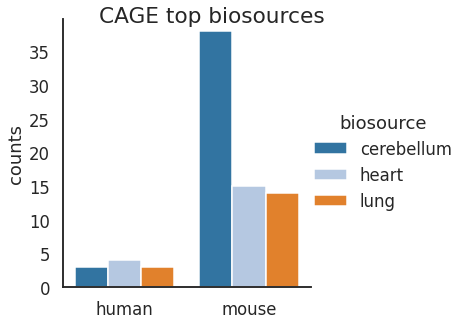

In [14]:
ax = sns.catplot(x="organism", hue="biosource", y = "counts", kind="bar", data=df_top5,
                 palette="tab20", legend_out=True)
ax.set(xlabel=None)
ax.fig.suptitle("CAGE top biosources")